In [4]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
import pathlib

In [5]:
TRAINING_DIR = 'D:/Python Notebooks/Bangkit Capstone Project/Final Train Test Split/Training'
VALIDATION_DIR = 'D:/Python Notebooks/Bangkit Capstone Project/Final Train Test Split/Testing'

In [6]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=30, 
                                     zoom_range=0.1, 
                                     width_shift_range=0.2,  
                                     height_shift_range=0.2)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  
  return train_generator, validation_generator

In [7]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22302 images belonging to 24 classes.
Found 7446 images belonging to 24 classes.


In [8]:
def create_model():

  model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Flatten(),                                 
                                      tf.keras.layers.Dense(256, activation='relu'),
                                      tf.keras.layers.Dropout(0.2),
                                      tf.keras.layers.Dense(24, activation='softmax')])

  model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy']) 
  
  return model

In [10]:
model = create_model()

history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30
697/697 [==============================] - 443s 635ms/step - loss: 2.9621 - accuracy: 0.0897 - val_loss: 2.2805 - val_accuracy: 0.2710
Epoch 2/30
697/697 [==============================] - 404s 580ms/step - loss: 2.0472 - accuracy: 0.3467 - val_loss: 1.1152 - val_accuracy: 0.6594
Epoch 3/30
697/697 [==============================] - 401s 576ms/step - loss: 1.2843 - accuracy: 0.5813 - val_loss: 0.5813 - val_accuracy: 0.8269
Epoch 4/30
697/697 [==============================] - 400s 574ms/step - loss: 0.9079 - accuracy: 0.7033 - val_loss: 0.4016 - val_accuracy: 0.8834
Epoch 5/30
697/697 [==============================] - 410s 589ms/step - loss: 0.7180 - accuracy: 0.7654 - val_loss: 0.3138 - val_accuracy: 0.9065
Epoch 6/30
697/697 [==============================] - 500s 718ms/step - loss: 0.6049 - accuracy: 0.8020 - val_loss: 0.2522 - val_accuracy: 0.9245
Epoch 7/30
697/697 [==============================] - 400s 574ms/step - loss: 0.5211 - accuracy: 0.8267 - val_loss: 0.2458 -

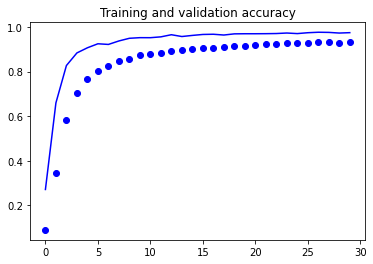

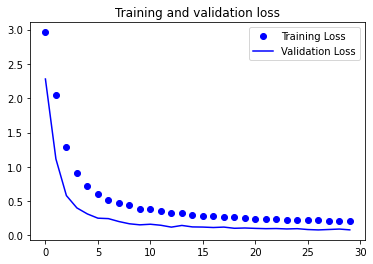

In [11]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

plot_loss_acc(history)

In [12]:
model.save('D:/Python Notebooks/Bangkit Capstone Project/Final Saved Model/alphabet_model.h5')

In [13]:
saved_model = 'D:/Python Notebooks/Bangkit Capstone Project/Final Saved Model/'
tf.saved_model.save(model, saved_model)

INFO:tensorflow:Assets written to: D:/Python Notebooks/Bangkit Capstone Project/Final Saved Model/assets


INFO:tensorflow:Assets written to: D:/Python Notebooks/Bangkit Capstone Project/Final Saved Model/assets


In [2]:
model = tf.keras.models.load_model("D:/Python Notebooks/Bangkit Capstone Project/New Saved Model/alphabet_model.h5")

In [35]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model)
tflite_model = converter.convert()

In [36]:
tflite_model_file = pathlib.Path('D:/Python Notebooks/Bangkit Capstone Project/Final Saved Model/alphabet_model.tflite')
tflite_model_file.write_bytes(tflite_model)

3614760

In [29]:
paths = []

classes = ['A', 'B', 'C', 'D', 'E', 'F', 
           'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S',  
           'T', 'U', 'V', 'W', 'X', 'Y']
    
for alphabet in classes:
    paths.append("D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/{}.jpg".format(alphabet))
print(paths)

['D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/A.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/B.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/C.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/D.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/E.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/F.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/G.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/H.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/I.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/K.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/L.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/M.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/N.jpg', 'D:/Python 

In [42]:
paths = []
paths.append("C:/Users/Arkana Yudhistira/Downloads/bg putih.jpeg")
print(paths)

['C:/Users/Arkana Yudhistira/Downloads/bg putih.jpeg']


In [34]:
print(paths[0])

D:/Python Notebooks/Bangkit Capstone Project/Module/Alphabet/A.jpg


1/1 [==============================] - 0s 24ms/step
C:/Users/Arkana Yudhistira/Downloads/bg putih.jpeg is a sign language of 'B'


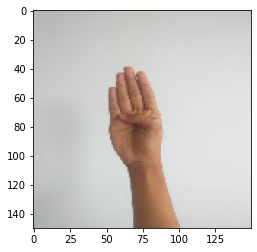

In [43]:
import numpy as np

for path in paths:
    img = tf.keras.preprocessing.image.load_img(path, target_size=(150,150))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    image_prob = model.predict(images, batch_size=50)
    index = image_prob[0].argmax(axis=-1)
    classes = ['A', 'B', 'C', 'D', 'E', 'F', 
               'G', 'H', 'I', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S',  
               'T', 'U', 'V', 'W', 'X', 'Y']
    print("{} is a sign language of '{}'".format(path, classes[index]))
    plt.imshow(img)